Name: Yicheng Fu

In [575]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn import ensemble
from sklearn import neighbors
from scipy.optimize import minimize

In [576]:
#technical = pd.read_csv('technical.csv')
#refdata = pd.read_csv('refdata.csv')
#fundamental = pd.read_csv('fundamental.csv')

technical = pd.read_csv('https://raw.githubusercontent.com/scmqtest/data/main/technical.csv')
refdata = pd.read_csv('https://raw.githubusercontent.com/scmqtest/data/main/refdata.csv')
fundamental = pd.read_csv('https://raw.githubusercontent.com/scmqtest/data/main/fundamental.csv')

print('Data shapes:', technical.shape, refdata.shape, fundamental.shape)

Data shapes: (142627, 6) (200, 3) (2291, 5)


# Data Cleaning

In [659]:
print("first 5 rows of technical")
print(technical.head(1))

first 5 rows of technical
     id       date  px_raw  px_adj     vlm_adj      beta  st_px_raw  \
0  7203 2020-01-06  7565.0  1513.0  33362500.0  0.737115  -0.125814   

   st_px_adj  st_vlm_adj  
0  -0.192602    2.070713  


In [660]:
print("first 5 rows of refdata")
print(refdata.head(1))

first 5 rows of refdata
     id       mktcap                    gics  st_mktcap
0  7203  29570914.77  Consumer Discretionary   8.607574


In [661]:
print("first 5 rows of fundamental")
print(fundamental.head(1))

first 5 rows of fundamental
     id       date        eps  revenue    st_eps  st_revenue
0  6146 2020-01-24  58.754232  34435.0 -0.006761   -0.653167


In [580]:
#drop column capex in fundamental, not included in the task description
fundamental.drop('capex', inplace=True, axis=1)

In [662]:
print("first 5 rows of fundamental")
print(fundamental.head(1))

first 5 rows of fundamental
     id       date        eps  revenue    st_eps  st_revenue
0  6146 2020-01-24  58.754232  34435.0 -0.006761   -0.653167


In [582]:
#missing values/NA
print(technical.isnull().sum(), refdata.isnull().sum(), fundamental.isnull().sum())

id         0
date       0
px_raw     0
px_adj     0
vlm_adj    0
beta       0
dtype: int64 id        0
mktcap    0
gics      0
dtype: int64 id         0
date       0
eps        1
revenue    0
dtype: int64


In [583]:
print(fundamental.loc[fundamental['eps'].isnull()])

        id        date  eps    revenue
2290  8750  2020-02-14  NaN  1649363.0


In [584]:
print(len(fundamental))

2291


In [585]:
##dropna
fundamental.dropna(inplace=True)

In [586]:
print(len(fundamental))

2290


In [587]:
#duplicate values
print(technical.duplicated().sum(),refdata.duplicated().sum(),fundamental.duplicated().sum())

0 0 0


In [588]:
#outlier&data type
print(technical.info(), technical.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142627 entries, 0 to 142626
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       142627 non-null  int64  
 1   date     142627 non-null  object 
 2   px_raw   142627 non-null  float64
 3   px_adj   142627 non-null  float64
 4   vlm_adj  142627 non-null  float64
 5   beta     142627 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ MB
None                   id        px_raw         px_adj       vlm_adj           beta
count  142627.000000  142627.00000  142627.000000  1.426270e+05  142627.000000
mean     6484.494822   16699.15830   15466.946504  4.472562e+06       0.813290
std      2267.463204   72600.27364   72449.741519  1.395169e+07       0.369436
min      1605.000000     112.50000      86.000000  7.000000e+00      -0.940880
25%      4568.000000    2010.00000    1892.000000  7.429000e+05       0.564853
50%      6857.000000    3681.00000   

In [589]:
print(refdata.info(), refdata.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      200 non-null    int64  
 1   mktcap  200 non-null    float64
 2   gics    200 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB
None                 id        mktcap
count   200.000000  2.000000e+02
mean   6491.615000  2.669342e+06
std    2267.439824  3.125337e+06
min    1605.000000  7.509639e+05
25%    4561.750000  9.988994e+05
50%    6859.000000  1.590918e+06
75%    8463.500000  2.804821e+06
max    9984.000000  2.957091e+07


In [590]:
print(fundamental.info(), fundamental.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2290 entries, 0 to 2289
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       2290 non-null   int64  
 1   date     2290 non-null   object 
 2   eps      2290 non-null   float64
 3   revenue  2290 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 89.5+ KB
None                 id           eps       revenue
count  2290.000000  2.290000e+03  2.290000e+03
mean   6471.413537  1.126620e+05  6.088157e+05
std    2263.294244  1.665434e+07  8.793784e+05
min    1605.000000 -4.196250e+08 -1.003745e+06
25%    4568.000000  1.770087e+01  1.420685e+05
50%    6762.000000  4.025600e+01  3.250230e+05
75%    8421.000000  8.833741e+01  7.013852e+05
max    9984.000000  6.773750e+08  9.218232e+06


In [591]:
#Convert the date column to datetime format
fundamental['date'] = pd.to_datetime(fundamental['date'])
technical['date'] = pd.to_datetime(technical['date'])

In [592]:
#standardize data
#scaler = StandardScaler()
def standardize_data(data):
    # Calculate the mean and standard deviation for each column
    means = data.mean(axis=0)
    stds = data.std(axis=0)
    
    # Subtract the mean and divide by the standard deviation for each column
    standardized_data = (data - means) / stds
    
    return standardized_data
# Standardize data in 'technical' DataFrame
technical[['st_px_raw', 'st_px_adj', 'st_vlm_adj']] = standardize_data(technical[['px_raw', 'px_adj', 'vlm_adj']])

# Standardize data in 'refdata' DataFrame
refdata[['st_mktcap']] = standardize_data(refdata[['mktcap']])

# Standardize data in 'fundamental' DataFrame
fundamental[['st_eps', 'st_revenue']] = standardize_data(fundamental[['eps', 'revenue']])



# Research Process

## Data Exploration

In [593]:
#randomly choose 2 stocks
random_ids = fundamental['id'].sample(n=2, random_state=2023).values
print(random_ids)

[3626 8830 6479]


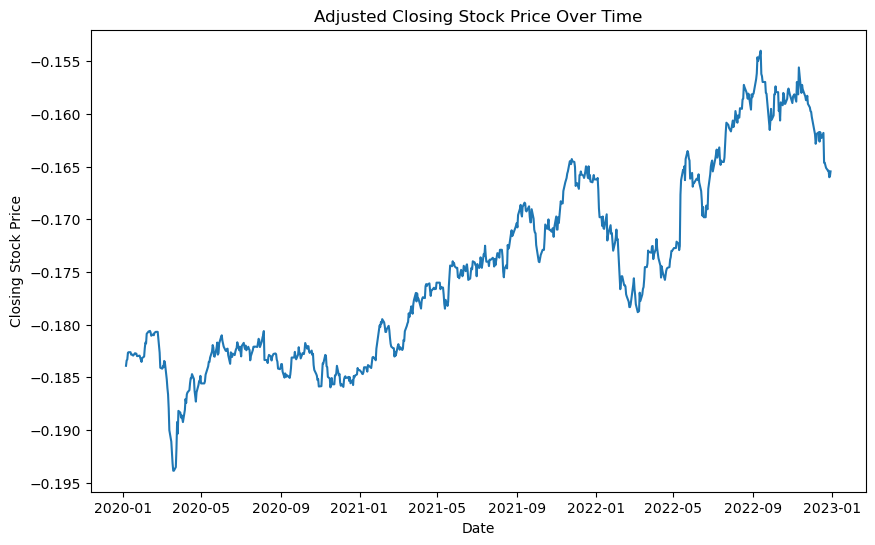

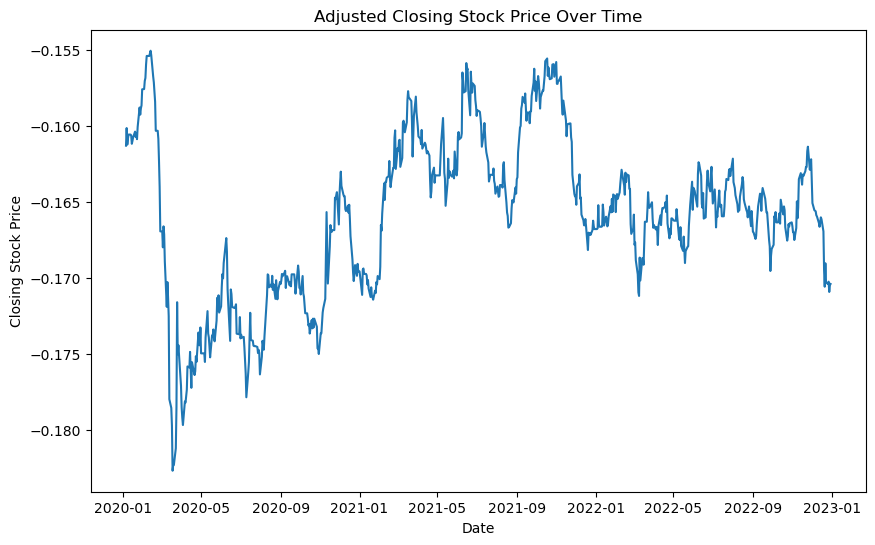

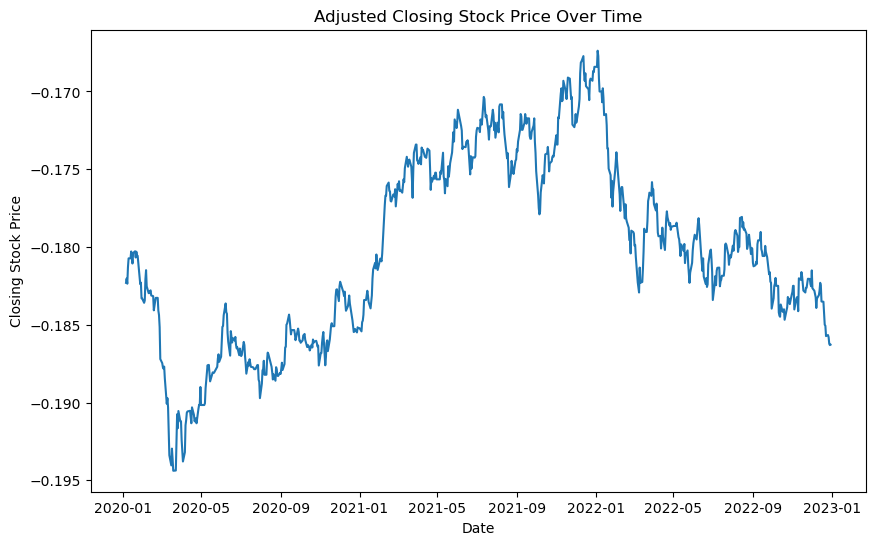

In [594]:
# Line chart of closing stock price over time
for i in random_ids:
    plt.figure(figsize=(10, 6))
    df = technical[technical['id'] == i]
    sns.lineplot(x='date', y='st_px_adj', data=df)
    plt.title('Adjusted Closing Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Stock Price')
    plt.show()

All three randomly selected stocks have similar trend: large drop in 2020-03; keep climbing from 2020-08 to 2022-01 with some fluctuations; constantly drop in a steady rate with large fluctuations afterwards

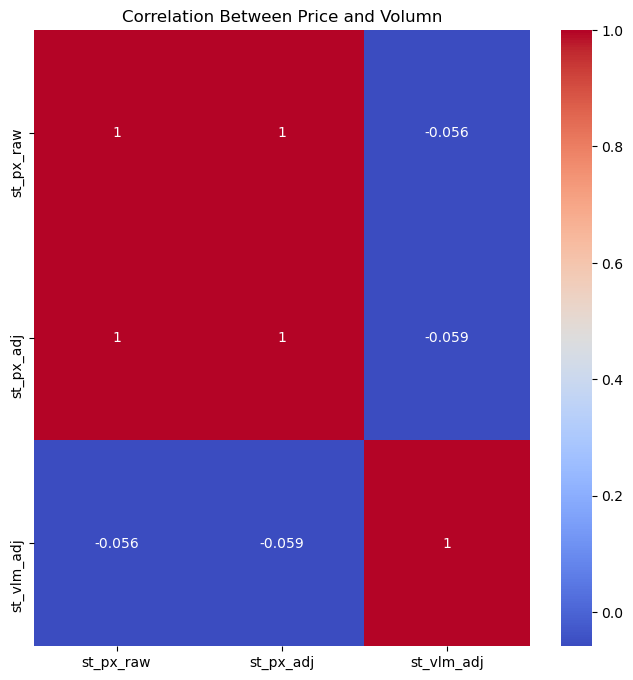

In [595]:
#Create a heatmap of the correlation between stock prices
corr = technical[["st_px_raw", 'st_px_adj', 'st_vlm_adj']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Price and Volumn')
plt.show()

From the heatmap, we can see that the raw and adjusted prices have a strong positive correlation, while they both have a weaker positive correlation with adjusted volume.

## Signal Construction & Robustness

A machine learning based trading strategy will be built.

To setup an ML framework, We create features which could have some predictive power (X), a target variable that we’d like to predict (Y) and use historical data to train a ML model that can predict Y as close as possible to the actual value. Finally, we use this model to make predictions on new data where Y is unknown.

Setup the problem:

At time T, we predict 'daily return' = 'price at T+1' - 'price of T' for particular stock.
By taking mean square error as a metric (objective function), minimizing the difference between the actual daily return and predicted daily return.
We could discover what would be X later.

In [596]:
df = technical[technical['id']==random_ids[0]]
#df.head(5)

### Target Y

In [597]:
df['next_price'] = df['st_px_adj'].shift(-1)
df['y'] = df['next_price'] - df['st_px_adj']
df.dropna(inplace=True)
df.tail(2)

/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/3830926338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_price'] = df['st_px_adj'].shift(-1)
/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/3830926338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['next_price'] - df['st_px_adj']
/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/3830926338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,id,date,px_raw,px_adj,vlm_adj,beta,st_px_raw,st_px_adj,st_vlm_adj,next_price,y
142244,3626,2022-12-28,3440.0,3440.0,318000.0,1.088075,-0.182632,-0.166004,-0.297782,-0.165935,0.000069
142416,3626,2022-12-29,3445.0,3445.0,243800.0,1.066585,-0.182563,-0.165935,-0.303100,-0.165452,0.000483


### X

#### Feature Engineering

In [598]:
def calculate_sma(data, period):
    return data.rolling(window=period).mean().fillna(0)

def calculate_ema(data, period):
    return data.ewm(span=period, adjust=False).mean().fillna(0)

def calculate_rsi(data, period):
    price_diff = data.diff()
    up = price_diff.where(price_diff > 0, 0)
    down = -price_diff.where(price_diff < 0, 0)
    avg_gain = up.rolling(window=period).mean()
    avg_loss = down.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi.fillna(0)

def calculate_macd(data, period_short, period_long, period_signal):
    ema_short = calculate_ema(data, period_short)
    ema_long = calculate_ema(data, period_long)
    macd_line = ema_short - ema_long
    macd_signal = calculate_ema(macd_line, period_signal)
    macd_histogram = macd_line - macd_signal
    return macd_line.fillna(0), macd_signal.fillna(0), macd_histogram.fillna(0)

def calculate_bollinger_bands(data, period, num_std):
    sma = calculate_sma(data, period)
    std = data.rolling(window=period).std()
    upper_band = sma + (num_std * std)
    lower_band = sma - (num_std * std)
    return upper_band.fillna(0), sma, lower_band.fillna(0)

# Calculate SMA
df['SMA_10'] = calculate_sma(df['st_px_adj'], 10)
df['SMA_20'] = calculate_sma(df['st_px_adj'], 20)
df['SMA_50'] = calculate_sma(df['st_px_adj'], 50)
df['SMA_100'] = calculate_sma(df['st_px_adj'], 100)
df['SMA_200'] = calculate_sma(df['st_px_adj'], 200)

# Calculate EMA
df['ema_10'] = calculate_ema(df['st_px_adj'], 10)
df['ema_20'] = calculate_ema(df['st_px_adj'], 20)
df['ema_50'] = calculate_ema(df['st_px_adj'], 50)
df['ema_100'] = calculate_ema(df['st_px_adj'], 100)
df['ema_200'] = calculate_ema(df['st_px_adj'], 200)

# Calculate RSI
df["rsi_14"] = calculate_rsi(df['st_px_adj'], 14)
df["rsi_21"] = calculate_rsi(df['st_px_adj'], 21)

# Calculate MACD with short period of 12 days, long period of 26 days, and signal period of 9 days
df['macd_line'], df['macd_signal'], df['macd_histogram'] = calculate_macd(df['st_px_adj'], 12, 26, 9)

# Calculate Bollinger Bands with a window of 20 days and 2 standard deviations
df['upper_band'], sma, df['lower_band'] = calculate_bollinger_bands(df['st_px_adj'], 20, 2)

/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/1742995758.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA_10'] = calculate_sma(df['st_px_adj'], 10)
/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/1742995758.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA_20'] = calculate_sma(df['st_px_adj'], 20)
/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/1742995758.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [599]:
#df.head(5)

,id,date,px_raw,px_adj,vlm_adj,beta,st_px_raw,st_px_adj,st_vlm_adj,next_price,...,ema_50,ema_100,ema_200,rsi_14,rsi_21,macd_line,macd_signal,macd_histogram,upper_band,lower_band
153,3626,2020-01-06,6430.0,2143.333333,612000.0,-0.647157,-0.141448,-0.183901,-0.276709,-0.183395,...,-0.183901,-0.183901,-0.183901,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
340,3626,2020-01-07,6540.0,2180.000000,695100.0,-0.692484,-0.139933,-0.183395,-0.270753,-0.183303,...,-0.183882,-0.183891,-0.183896,0.0,0.0,0.000040,0.000008,0.000032,0.0,0.0
531,3626,2020-01-08,6560.0,2186.666667,771900.0,-0.583929,-0.139657,-0.183303,-0.265248,-0.182659,...,-0.183859,-0.183880,-0.183891,0.0,0.0,0.000079,0.000022,0.000057,0.0,0.0
718,3626,2020-01-09,6700.0,2233.333333,526800.0,-0.355845,-0.137729,-0.182659,-0.282816,-0.182613,...,-0.183812,-0.183856,-0.183878,0.0,0.0,0.000160,0.000050,0.000110,0.0,0.0
905,3626,2020-01-10,6710.0,2236.666667,894000.0,-0.350475,-0.137591,-0.182613,-0.256497,-0.182613,...,-0.183765,-0.183831,-0.183866,0.0,0.0,0.000225,0.000085,0.000140,0.0,0.0


There are many many indicators which could be included. I just include these simple yet proven-effective ones for example.

In [601]:
#settle down X, y
y = df['y']
X = df[['beta', 'st_px_raw',
       'st_px_adj', 'st_vlm_adj', 'SMA_10', 'SMA_20',
       'SMA_50', 'SMA_100', 'SMA_200', 'ema_10', 'ema_20', 'ema_50', 'ema_100',
       'ema_200', 'rsi_14', 'rsi_21', 'macd_line', 'macd_signal',
       'macd_histogram', 'upper_band', 'lower_band']]
#num_X = len(X.columns)
#print("number of X:", num_X)

number of X: 21


In [602]:
#X.head(5)

,beta,st_px_raw,st_px_adj,st_vlm_adj,SMA_10,SMA_20,SMA_50,SMA_100,SMA_200,ema_10,...,ema_50,ema_100,ema_200,rsi_14,rsi_21,macd_line,macd_signal,macd_histogram,upper_band,lower_band
153,-0.647157,-0.141448,-0.183901,-0.276709,0.0,0.0,0.0,0.0,0.0,-0.183901,...,-0.183901,-0.183901,-0.183901,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
340,-0.692484,-0.139933,-0.183395,-0.270753,0.0,0.0,0.0,0.0,0.0,-0.183809,...,-0.183882,-0.183891,-0.183896,0.0,0.0,0.000040,0.000008,0.000032,0.0,0.0
531,-0.583929,-0.139657,-0.183303,-0.265248,0.0,0.0,0.0,0.0,0.0,-0.183717,...,-0.183859,-0.183880,-0.183891,0.0,0.0,0.000079,0.000022,0.000057,0.0,0.0
718,-0.355845,-0.137729,-0.182659,-0.282816,0.0,0.0,0.0,0.0,0.0,-0.183525,...,-0.183812,-0.183856,-0.183878,0.0,0.0,0.000160,0.000050,0.000110,0.0,0.0
905,-0.350475,-0.137591,-0.182613,-0.256497,0.0,0.0,0.0,0.0,0.0,-0.183359,...,-0.183765,-0.183831,-0.183866,0.0,0.0,0.000225,0.000085,0.000140,0.0,0.0


In [603]:
#len(X)

746

#### Feature Selection

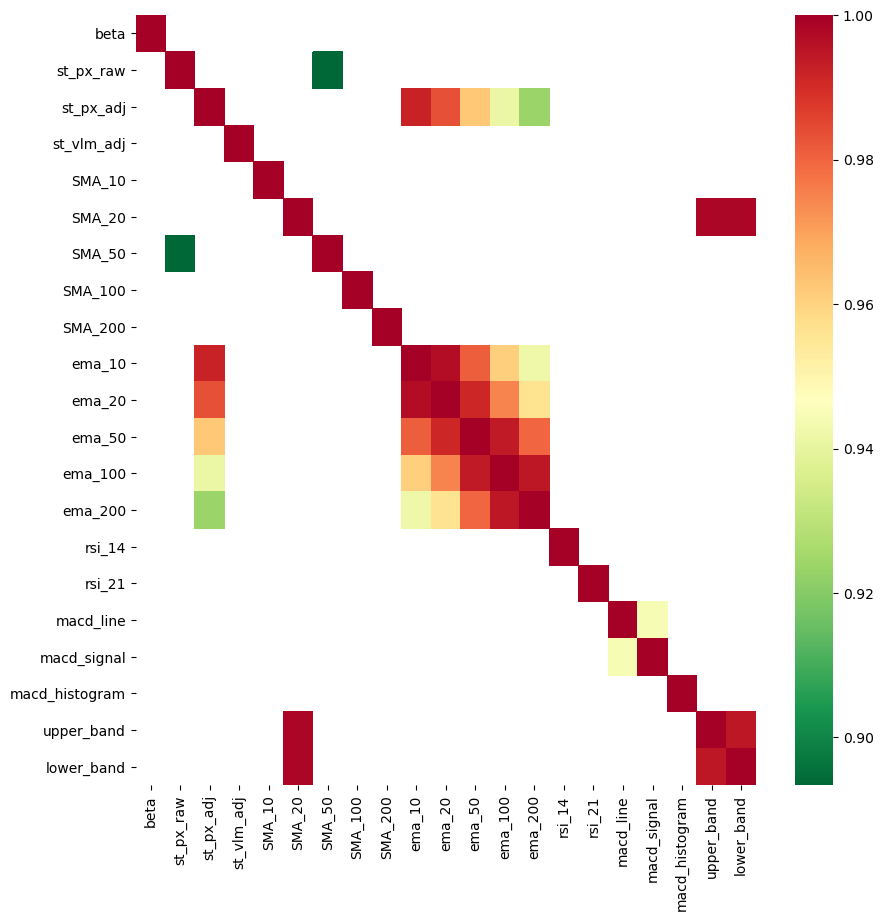

In [604]:
#firstly select X based on inside correlation
c = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(c, cmap='RdYlGn_r', mask = (np.abs(c) <= 0.8))
plt.show()

In [605]:
#remove few X variables
columns_to_drop = ["st_px_adj", 'ema_10', 'ema_50', 'ema_200', 'upper_band']
X_1 = X.drop(columns=columns_to_drop)
#print(len(X_1.columns))

16


In [606]:
#X_1.head(5)

,beta,st_px_raw,st_vlm_adj,SMA_10,SMA_20,SMA_50,SMA_100,SMA_200,ema_20,ema_100,rsi_14,rsi_21,macd_line,macd_signal,macd_histogram,lower_band
153,-0.647157,-0.141448,-0.276709,0.0,0.0,0.0,0.0,0.0,-0.183901,-0.183901,0.0,0.0,0.000000,0.000000,0.000000,0.0
340,-0.692484,-0.139933,-0.270753,0.0,0.0,0.0,0.0,0.0,-0.183853,-0.183891,0.0,0.0,0.000040,0.000008,0.000032,0.0
531,-0.583929,-0.139657,-0.265248,0.0,0.0,0.0,0.0,0.0,-0.183801,-0.183880,0.0,0.0,0.000079,0.000022,0.000057,0.0
718,-0.355845,-0.137729,-0.282816,0.0,0.0,0.0,0.0,0.0,-0.183692,-0.183856,0.0,0.0,0.000160,0.000050,0.000110,0.0
905,-0.350475,-0.137591,-0.256497,0.0,0.0,0.0,0.0,0.0,-0.183589,-0.183831,0.0,0.0,0.000225,0.000085,0.000140,0.0


In [607]:
#len(X_1)

746

According to the figure of correlation heatmap, few X variables are excluded due to high correlation with others (st_px_adj, ema_10, ema_50, ema_200, upper_band).

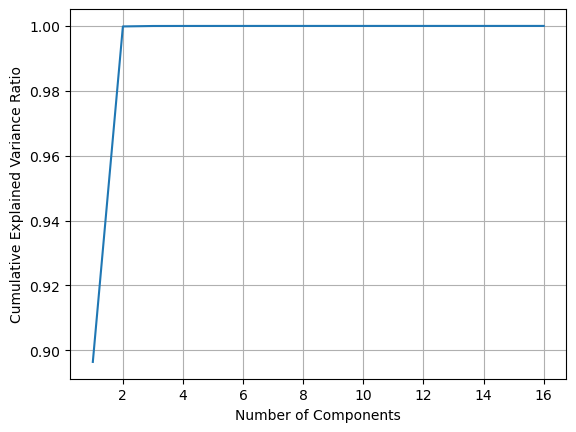

In [608]:
#secondly select X based on PCA
# Instantiate the PCA object
pca = PCA()

# Fit the PCA model on your data
pca.fit(X_1)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [609]:
# Instantiate the PCA object with the desired number of components (5)
n_components = 5  # Set the desired number of components
pca = PCA(n_components=n_components)

# Fit the PCA model on your data
pca.fit(X_1)

# Transform the data to the first n_components principal components
X_pca = pca.transform(X_1)

# Access the explained variance ratio of each component
explained_variance_ratio = pca.explained_variance_ratio_

In [610]:
#len(X_pca)

746

In [611]:
# Determine the indices for splitting
total_samples = len(X_pca)
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

train_samples = int(total_samples * train_ratio)
val_samples = int(total_samples * val_ratio)

# Split the data into train, validation, and test sets
train_data = X_pca[:train_samples]
val_data = X_pca[train_samples:train_samples+val_samples]
test_data = X_pca[train_samples+val_samples:]

train_labels = y[:train_samples]
val_labels = y[train_samples:train_samples+val_samples]
test_labels = y[train_samples+val_samples:]

train_date = df[['date', 'px_adj']][:train_samples]
val_date = df[['date', 'px_adj']][train_samples:train_samples+val_samples]
test_date = df[['date', 'px_adj']][train_samples+val_samples:]

In [612]:
#len(train_data), len(val_data), len(test_data)

(522, 111, 113)

### Model Selection

In [613]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
#Linear regression
def linear_regression(basis_X_train, basis_y_train, basis_X_test,basis_y_test):
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(basis_X_train, basis_y_train)
    # Make predictions using the testing set
    basis_y_pred = regr.predict(basis_X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(basis_y_test, basis_y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(basis_y_test, basis_y_pred))

    # Plot outputs
    plt.scatter(basis_y_pred, basis_y_test,  color='black')
    plt.plot(basis_y_test, basis_y_test, color='blue', linewidth=3)

    plt.xlabel('Y(actual)')
    plt.ylabel('Y(Predicted)')

    plt.show()
    
    return regr, basis_y_pred

In [614]:
sd_train_X, sd_val_X, sd_test_X = standardize_data(train_data), standardize_data(val_data), standardize_data(test_data)
sd_train_y, sd_val_y, sd_test_y = standardize_data(train_labels), standardize_data(val_labels), standardize_data(test_labels)

Coefficients: 
 [ 8.91997563e-08  5.05303207e-06 -2.72163580e-05 -1.90769117e-04
  6.15460556e-04]
Mean squared error: 0.00
Variance score: 0.00


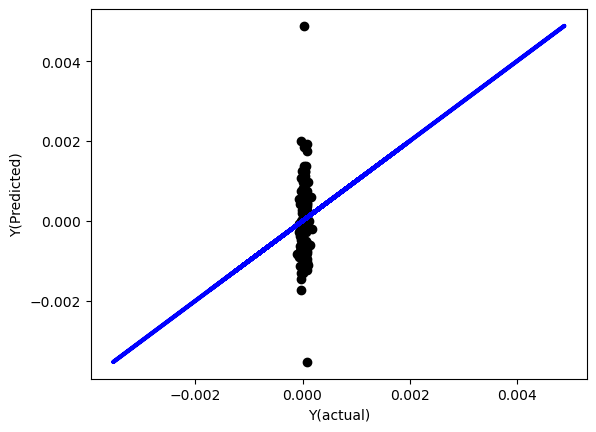

In [615]:
#_, y_pred_linear = linear_regression(train_data, train_labels, val_data, val_labels)
#not show due to computationa time limit

The data without standardization is not right.

Coefficients: 
 [ 0.00340786  0.0666253  -0.01338283 -0.03070375  0.05287612]
Mean squared error: 0.99
Variance score: 0.00


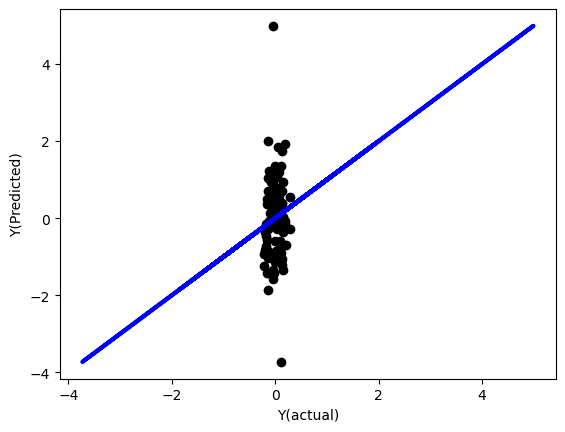

In [616]:
ln_model, y_pred_linear_sd = linear_regression(sd_train_X, sd_train_y, sd_val_X, sd_val_y)

In [617]:
len(y_pred_linear_sd)

111

Mean squared error: 1.20
Variance score: -0.21


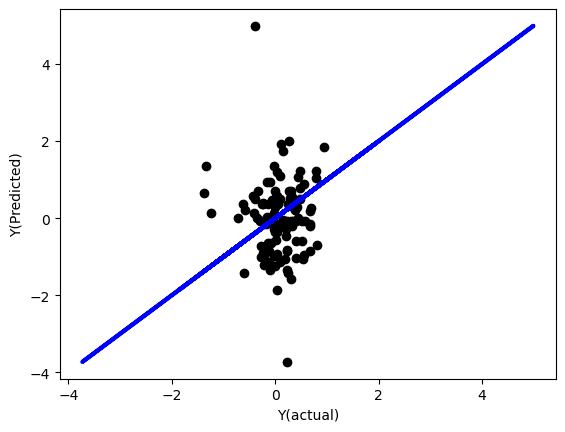

In [618]:
from sklearn import neighbors
#KNN
n_neighbors = 5

knn_model = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
knn_model.fit(sd_train_X, sd_train_y)
y_pred_knn_sd = knn_model.predict(sd_val_X)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(sd_val_y, y_pred_knn_sd))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(sd_val_y, y_pred_knn_sd))

# Plot outputs
plt.scatter(y_pred_knn_sd, sd_val_y,  color='black')
plt.plot(sd_val_y, sd_val_y, color='blue', linewidth=3)

plt.xlabel('Y(actual)')
plt.ylabel('Y(Predicted)')

plt.show()

y_knn = y_pred_knn_sd.copy()

Mean squared error: 1.22
Variance score: -0.23


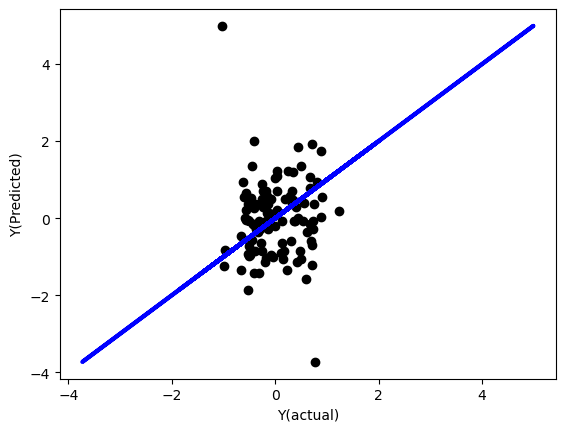

In [619]:
from sklearn import ensemble
#Decision Tree
tree_model=ensemble.ExtraTreesRegressor()
tree_model.fit(sd_train_X, sd_train_y)
y_pred_dt_sd = tree_model.predict(sd_val_X)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(sd_val_y, y_pred_dt_sd))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(sd_val_y, y_pred_dt_sd))

# Plot outputs
plt.scatter(y_pred_dt_sd, sd_val_y,  color='black')
plt.plot(sd_val_y, sd_val_y, color='blue', linewidth=3)

plt.xlabel('Y(actual)')
plt.ylabel('Y(Predicted)')

plt.show()

y_dt = y_pred_dt_sd.copy()

Mean squared error: 8.37
Variance score: -7.44


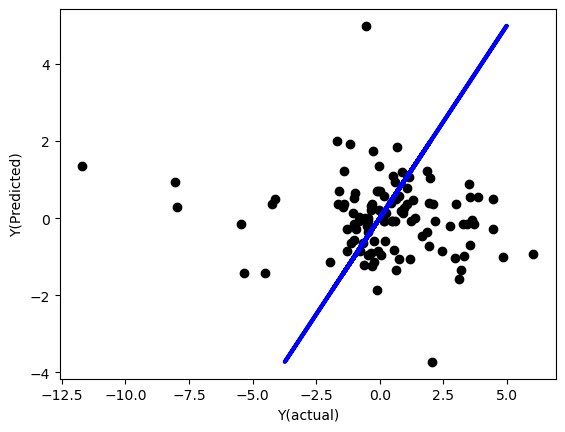

In [620]:
from sklearn.svm import SVR
#SVR

svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)


svr_model.fit(sd_train_X, sd_train_y)
y_pred_svr_sd = svr_model.predict(sd_val_X)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(sd_val_y, y_pred_svr_sd))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(sd_val_y, y_pred_svr_sd))

# Plot outputs
plt.scatter(y_pred_svr_sd, sd_val_y,  color='black')
plt.plot(sd_val_y, sd_val_y, color='blue', linewidth=3)

plt.xlabel('Y(actual)')
plt.ylabel('Y(Predicted)')

plt.show()

y_svr = y_pred_svr_sd.copy()


The linear regression fits well but overfitting is a problem based on the graph; The SVR's MSE is too high. Use an ensemble method to balance between the error and overfitting.

Mean squared error: 1.70
Variance score: -0.71


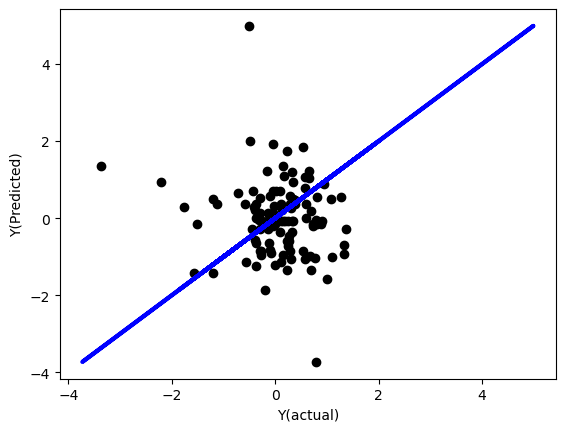

In [621]:
#Ensemble method
y_ensemble = (y_pred_linear_sd + y_dt + y_knn + y_svr)/4
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(sd_val_y, y_ensemble))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(sd_val_y, y_ensemble))

# Plot outputs
plt.scatter(y_ensemble, sd_val_y,  color='black')
plt.plot(sd_val_y, sd_val_y, color='blue', linewidth=3)

plt.xlabel('Y(actual)')
plt.ylabel('Y(Predicted)')

plt.show()

In [622]:
#trading signal
##test_data, test_labels, test_date
##sd_test_X, sd_test_y
##ln_model, knn_model, svr_model, tree_model
test_y_pred_ln = ln_model.predict(sd_test_X)
test_y_pred_knn = knn_model.predict(sd_test_X)
test_y_pred_dt = tree_model.predict(sd_test_X)
test_y_pred_svr = svr_model.predict(sd_test_X)
test_y_ensemble = (test_y_pred_ln + test_y_pred_knn + test_y_pred_dt + test_y_pred_svr)/4

In [623]:
len(test_y_ensemble), len(test_date)

(113, 113)

In [624]:
backtest = pd.DataFrame({'date': test_date['date'], 'price': test_date['px_adj'], 'pred': test_y_ensemble})
# Create the 'signal' column based on the 'pred' values
#not consider 'hold' in such short data period
backtest['signal'] = backtest['pred'].apply(lambda x: 1 if x > 0 else 0)
backtest['sd_price'] = standardize_data(backtest['price'])
backtest['position'] = backtest['signal'].diff()

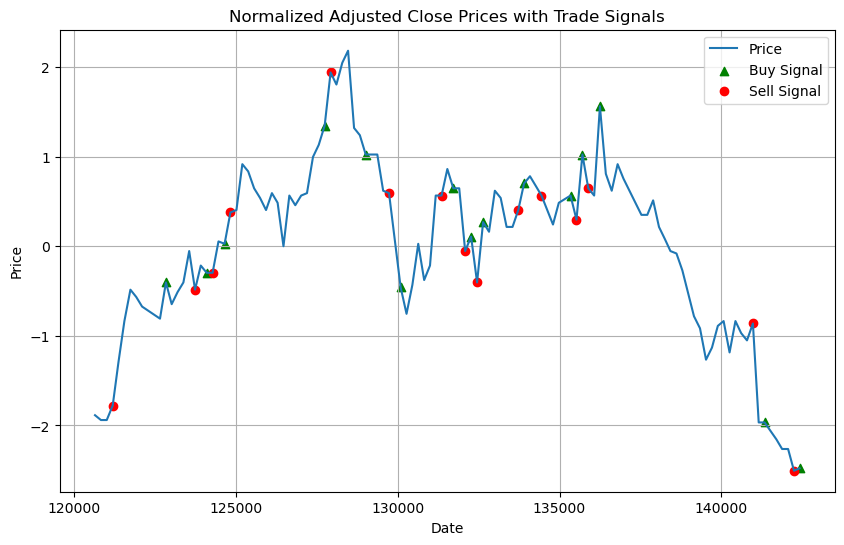

In [625]:
plt.figure(figsize=(10, 6))
plt.plot(backtest["sd_price"], label='Price')
plt.scatter(backtest[backtest["position"] == 1].index, backtest["sd_price"][backtest["position"] == 1], color="g", label="Buy Signal", marker='^')
plt.scatter(backtest[backtest["position"] == -1].index, backtest["sd_price"][backtest["position"] == -1], color="r", label="Sell Signal")
plt.title("Normalized Adjusted Close Prices with Trade Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.show()

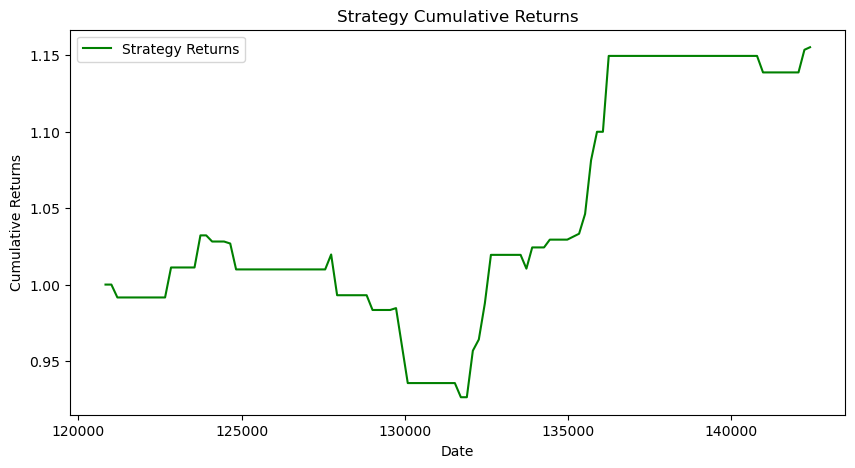

In [626]:
# Calculate the log returns
backtest['Log_Returns'] = np.log(backtest['price'] / backtest['price'].shift(1))
# Calculate the daily returns of the strategy
backtest['Strategy_Returns'] = backtest['Log_Returns'] * backtest['position']

# Calculate the cumulative returns of the strategy
backtest['Strategy_Cumulative_Returns'] = (1 + backtest['Strategy_Returns']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(10,5))
plt.plot(backtest['Strategy_Cumulative_Returns'], color='g', label='Strategy Returns')
plt.title('Strategy Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

## Finalize & Signal Construction

Finalize all steps into several functions, any test on other stocks.

In [666]:
#re-randomly choose 2 stocks, due to computational time limit
random_ids_1 = fundamental['id'].sample(n=2, random_state=18).values
print(random_ids_1)

[9843 3064]


In [667]:
def prediction(stock_id: int):
    df = technical[technical['id']==stock_id]

    df['next_price'] = df['st_px_adj'].shift(-1)
    df['y'] = df['next_price'] - df['st_px_adj']
    df.dropna(inplace=True)

    df['SMA_10'] = calculate_sma(df['st_px_adj'], 10)
    df['SMA_20'] = calculate_sma(df['st_px_adj'], 20)
    df['SMA_50'] = calculate_sma(df['st_px_adj'], 50)
    df['SMA_100'] = calculate_sma(df['st_px_adj'], 100)
    df['SMA_200'] = calculate_sma(df['st_px_adj'], 200)

    # Calculate EMA
    df['ema_10'] = calculate_ema(df['st_px_adj'], 10)
    df['ema_20'] = calculate_ema(df['st_px_adj'], 20)
    df['ema_50'] = calculate_ema(df['st_px_adj'], 50)
    df['ema_100'] = calculate_ema(df['st_px_adj'], 100)
    df['ema_200'] = calculate_ema(df['st_px_adj'], 200)

    # Calculate RSI
    df["rsi_14"] = calculate_rsi(df['st_px_adj'], 14)
    df["rsi_21"] = calculate_rsi(df['st_px_adj'], 21)

    # Calculate MACD with short period of 12 days, long period of 26 days, and signal period of 9 days
    df['macd_line'], df['macd_signal'], df['macd_histogram'] = calculate_macd(df['st_px_adj'], 12, 26, 9)

    # Calculate Bollinger Bands with a window of 20 days and 2 standard deviations
    df['upper_band'], sma, df['lower_band'] = calculate_bollinger_bands(df['st_px_adj'], 20, 2)

    #settle down X, y
    y = df['y']
    X = df[['beta', 'st_px_raw',
       'st_px_adj', 'st_vlm_adj', 'SMA_10', 'SMA_20',
       'SMA_50', 'SMA_100', 'SMA_200', 'ema_10', 'ema_20', 'ema_50', 'ema_100',
       'ema_200', 'rsi_14', 'rsi_21', 'macd_line', 'macd_signal',
       'macd_histogram', 'upper_band', 'lower_band']]
    num_X = len(X.columns)

    #remove few X variables
    columns_to_drop = ["st_px_adj", 'ema_10', 'ema_50', 'ema_200', 'upper_band']
    X_1 = X.drop(columns=columns_to_drop)

    # Instantiate the PCA object with the desired number of components (5)
    n_components = 5  # Set the desired number of components
    pca = PCA(n_components=n_components)

    # Fit the PCA model on your data
    pca.fit(X_1)

    # Transform the data to the first n_components principal components
    X_pca = pca.transform(X_1)

    # Access the explained variance ratio of each component
    explained_variance_ratio = pca.explained_variance_ratio_

    # Determine the indices for splitting
    total_samples = len(X_pca)
    rain_ratio = 0.7
    val_ratio = 0.15
    test_ratio = 0.15

    train_samples = int(total_samples * train_ratio)
    val_samples = int(total_samples * val_ratio)

    # Split the data into train, validation, and test sets
    train_data = X_pca[:train_samples]
    val_data = X_pca[train_samples:train_samples+val_samples]
    test_data = X_pca[train_samples+val_samples:]

    train_labels = y[:train_samples]
    val_labels = y[train_samples:train_samples+val_samples]
    test_labels = y[train_samples+val_samples:]

    train_date = df[['date', 'px_adj']][:train_samples]
    val_date = df[['date', 'px_adj']][train_samples:train_samples+val_samples]
    test_date = df[['date', 'px_adj']][train_samples+val_samples:]

    sd_train_X, sd_val_X, sd_test_X = standardize_data(train_data), standardize_data(val_data), standardize_data(test_data)
    sd_train_y, sd_val_y, sd_test_y = standardize_data(train_labels), standardize_data(val_labels), standardize_data(test_labels)
    
    #Linear regression
    def linear_regression(basis_X_train, basis_y_train, basis_X_test,basis_y_test):
      regr = linear_model.LinearRegression()
      # Train the model using the training sets
      regr.fit(basis_X_train, basis_y_train)
      # Make predictions using the testing set
      basis_y_pred = regr.predict(basis_X_test)

      # The coefficients
      #print('Coefficients: \n', regr.coef_)
      # The mean squared error
      #print("Mean squared error: %.2f" % mean_squared_error(basis_y_test, basis_y_pred))
      # Explained variance score: 1 is perfect prediction
      #print('Variance score: %.2f' % r2_score(basis_y_test, basis_y_pred))
    
      return regr, basis_y_pred
    ln_model, y_pred_linear_sd = linear_regression(sd_train_X, sd_train_y, sd_val_X, sd_val_y)

    #KNN
    n_neighbors = 5

    knn_model = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
    knn_model.fit(sd_train_X, sd_train_y)
    y_pred_knn_sd = knn_model.predict(sd_val_X)

    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(sd_val_y, y_pred_knn_sd))
    # Explained variance score: 1 is perfect prediction
    #print('Variance score: %.2f' % r2_score(sd_val_y, y_pred_knn_sd))

    y_knn = y_pred_knn_sd.copy()

    #Decision Tree
    tree_model=ensemble.ExtraTreesRegressor()
    tree_model.fit(sd_train_X, sd_train_y)
    y_pred_dt_sd = tree_model.predict(sd_val_X)

    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(sd_val_y, y_pred_dt_sd))
    # Explained variance score: 1 is perfect prediction
    #print('Variance score: %.2f' % r2_score(sd_val_y, y_pred_dt_sd))

    y_dt = y_pred_dt_sd.copy()

    svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)


    svr_model.fit(sd_train_X, sd_train_y)
    y_pred_svr_sd = svr_model.predict(sd_val_X)

    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(sd_val_y, y_pred_svr_sd))
    # Explained variance score: 1 is perfect prediction
    #print('Variance score: %.2f' % r2_score(sd_val_y, y_pred_svr_sd))

    y_svr = y_pred_svr_sd.copy()

    #Ensemble method
    y_ensemble = (y_pred_linear_sd + y_dt + y_knn + y_svr)/4
    # The mean squared error
    #print("Mean squared error: %.2f"% mean_squared_error(sd_val_y, y_ensemble))
    # Explained variance score: 1 is perfect prediction
    #print('Variance score: %.2f' % r2_score(sd_val_y, y_ensemble))

    return test_date, sd_test_X, sd_test_y, pca, ln_model, knn_model, svr_model, tree_model


In [668]:
for i in random_ids:
    prediction(i)

/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_price'] = df['st_px_adj'].shift(-1)
/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['next_price'] - df['st_px_adj']
/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_price'] = df['st_px_adj'].shift(-1)
/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['next_price'] - df['st_px_adj']
/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [669]:
def trading_signal(stock_id):
    test_date, sd_test_X, sd_test_y, pca, ln_model, knn_model, svr_model, tree_model = prediction(stock_id)
    test_y_pred_ln = ln_model.predict(sd_test_X)
    test_y_pred_knn = knn_model.predict(sd_test_X)
    test_y_pred_dt = tree_model.predict(sd_test_X)
    test_y_pred_svr = svr_model.predict(sd_test_X)
    test_y_ensemble = (test_y_pred_ln + test_y_pred_knn + test_y_pred_dt + test_y_pred_svr)/4
    backtest = pd.DataFrame({'date': test_date['date'], 'price': test_date['px_adj'], 'pred': test_y_ensemble})
    # Create the 'signal' column based on the 'pred' values
    #not consider 'hold' in such short data period
    backtest['signal'] = backtest['pred'].apply(lambda x: 1 if x > 0 else 0)
    backtest['sd_price'] = standardize_data(backtest['price'])
    backtest['position'] = backtest['signal'].diff()
    plt.figure(figsize=(10, 6))
    plt.plot(backtest["sd_price"], label='Price')
    plt.scatter(backtest[backtest["position"] == 1].index, backtest["sd_price"][backtest["position"] == 1], color="g", label="Buy Signal", marker='^')
    plt.scatter(backtest[backtest["position"] == -1].index, backtest["sd_price"][backtest["position"] == -1], color="r", label="Sell Signal")
    plt.title("Normalized Adjusted Close Prices with Trade Signals")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)

    plt.show()

    # Calculate the log returns
    backtest['Log_Returns'] = np.log(backtest['price'] / backtest['price'].shift(1))
    # Calculate the daily returns of the strategy
    backtest['Strategy_Returns'] = backtest['Log_Returns'] * backtest['position']

    # Calculate the cumulative returns of the strategy, assume the initial is 1
    backtest['Strategy_Cumulative_Returns'] = (1 + backtest['Strategy_Returns']).cumprod()

    # Plot the cumulative returns
    plt.figure(figsize=(10,5))
    plt.plot(backtest['Strategy_Cumulative_Returns'], color='g', label='Strategy Returns')
    plt.title('Strategy Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.show()

    return backtest

After trials on three randomly selected stocks, all stocks are close in terms of both MSE and Variance score. The robustness is good.

# Backtest Presentation & Signal Evaluation Metrics

/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_price'] = df['st_px_adj'].shift(-1)
/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['next_price'] - df['st_px_adj']
/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

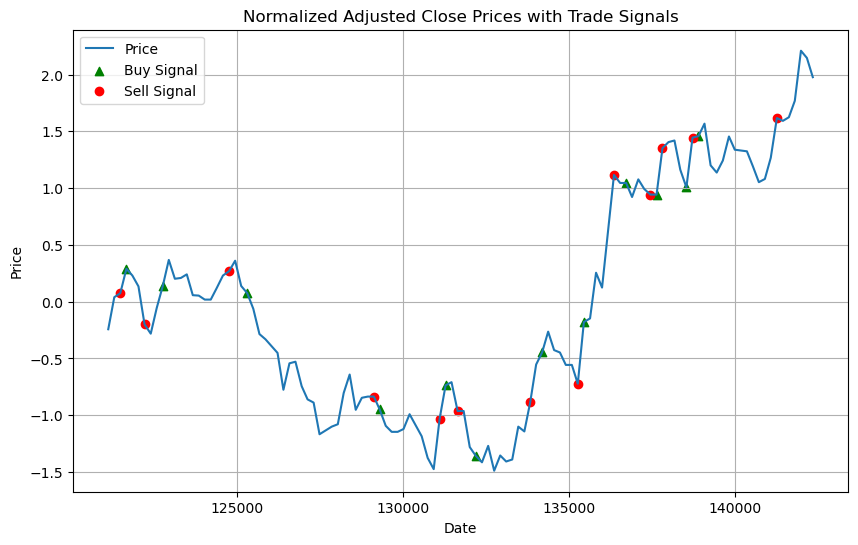

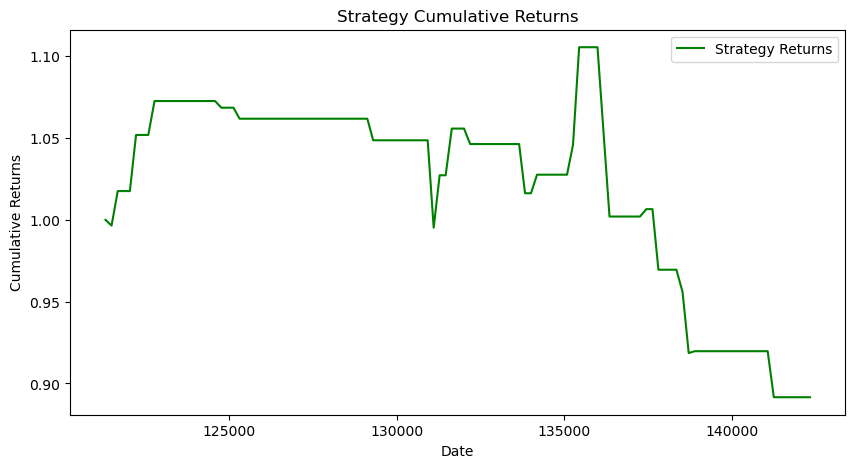

Total Return: -0.10842880224332052
Annualized Return: -0.22581716818386477
Annual Volatility: 0.23193741650295505
Sharpe Ratio: -0.994038866395865
Calmar Ratio: -1.0553893130835286
Sortino Ratio: -0.5812247892758194
Win Ratio: 0.08849557522123894
Average Trade Return: -0.0009149000260927897
Expected Profits: -0.009149000260927896
Expected Losses: -0.010978800313113476
Total Profits: 0.22633744778541687
Total Losses: -0.3288062507078093
Maximum Drawdown: 0.21396575214893476


In [671]:
# Define the backtesting framework
class BacktestingFramework:
    def __init__(self, data):
        self.data = data
        self.strategy_returns = data["Strategy_Returns"].tolist()
        self.cumulative_returns = data["Strategy_Cumulative_Returns"].tolist()

    def calculate_metrics(self):
        total_return = self.cumulative_returns[-1] - 1
        annualized_return = (total_return + 1) ** (252 / len(self.data)) - 1
        annual_volatility = np.nanstd(self.strategy_returns) * (252 ** 0.5)
        maximum_drawdown = (pd.Series(self.cumulative_returns).cummax() - pd.Series(self.cumulative_returns)).max()
        sharpe_ratio = np.nanmean(self.strategy_returns) / np.nanstd(self.strategy_returns) * (252 ** 0.5)
        calmar_ratio = annualized_return / maximum_drawdown
        sortino_ratio = np.nanmean(self.strategy_returns) / np.nanstd([x for x in self.strategy_returns if x < 0]) * (252 ** 0.5)
        win_ratio = len([x for x in self.strategy_returns if x > 0]) / len(self.strategy_returns)
        average_trade_return = np.nanmean(self.strategy_returns)
        expected_profits = len([x for x in self.strategy_returns if x > 0]) * average_trade_return
        expected_losses = len([x for x in self.strategy_returns if x < 0]) * average_trade_return
        total_profits = sum([x for x in self.strategy_returns if x > 0])
        total_losses = sum([x for x in self.strategy_returns if x < 0])

        print("Total Return:", total_return)
        print("Annualized Return:", annualized_return)
        print("Annual Volatility:", annual_volatility)
        print("Sharpe Ratio:", sharpe_ratio)
        print("Calmar Ratio:", calmar_ratio)
        print("Sortino Ratio:", sortino_ratio)
        print("Win Ratio:", win_ratio)
        print("Average Trade Return:", average_trade_return)
        print("Expected Profits:", expected_profits)
        print("Expected Losses:", expected_losses)
        print("Total Profits:", total_profits)
        print("Total Losses:", total_losses)
        print("Maximum Drawdown:", maximum_drawdown)

# Create an instance of the backtesting framework

backtest_data = trading_signal(random_ids_1[0])

backtest = BacktestingFramework(backtest_data)

# Calculate metrics
total_return = backtest.calculate_metrics()

List of Metrics:

Total Return: The overall return generated by the trading strategy over the entire backtesting period.

Annualized Return: The average annual return of the trading strategy, assuming compounding over the entire backtesting period.

Annual Volatility: The standard deviation of the strategy returns, scaled to an annual basis, which measures the volatility or riskiness of the strategy.

Sharpe Ratio: The risk-adjusted return of the strategy, calculated as the ratio of the average strategy return to the standard deviation of the strategy returns. It provides a measure of the excess return generated per unit of risk.

Calmar Ratio: The ratio of the annualized return to the maximum drawdown. It measures the risk-adjusted return by considering the downside risk (maximum drawdown) relative to the return.

Sortino Ratio: A risk-adjusted return metric similar to the Sharpe ratio, but it only considers the downside risk. It is calculated as the ratio of the average strategy return to the standard deviation of the negative strategy returns.

Win Ratio: The percentage of trades that result in a positive return. It measures the proportion of profitable trades relative to the total number of trades.

Average Trade Return: The average return per trade, calculated as the mean of the strategy returns.

Expected Profits: The total expected profits based on the average trade return and the number of profitable trades.

Expected Losses: The total expected losses based on the average trade return and the number of losing trades.

Total Profits: The sum of all profitable trade returns.

Total Losses: The sum of all losing trade returns.

# Portfolio construction and risk management

The overall aim here is to minimize Value-at-Risk (VaR) using the variance and covariance method while adhering to the constraint of the sum of weights equaling 1.

## Selecting Stocks

In [672]:
refdata['gics'].describe()

count             200
unique             11
top       Industrials
freq               44
Name: gics, dtype: object

In [673]:
refdata['gics'].value_counts()

Industrials               44
Consumer Discretionary    27
Information Technology    27
Financials                22
Consumer Staples          18
Communication Services    15
Health Care               15
Materials                 14
Real Estate               10
Utilities                  5
Energy                     3
Name: gics, dtype: int64

Select no top 10 stocks based on the predicted 'total revenue' from all stocks, ensuring that no more than 5 stocks in a single sector.
(Based on the computational time limit on the server, directly choose 2)

In [674]:
#stock_list = []
#for i in refdata['gics'].unique():
    #random_ids_2 = refdata[refdata['gics']==i]['id'].sample(n=1, random_state=306).values.tolist()
    #stock_list = stock_list + random_ids_2
random_ids_2 = np.random.choice(refdata['id'].unique(), size=2, replace=False).tolist()
stock_list = random_ids_2
stock_list

[3769, 7182]

In [675]:
#len(stock_list)

In [676]:
def trading_signal_no_graph(stock_id):
    test_date, sd_test_X, sd_test_y, pca, ln_model, knn_model, svr_model, tree_model = prediction(stock_id)
    test_y_pred_ln = ln_model.predict(sd_test_X)
    test_y_pred_knn = knn_model.predict(sd_test_X)
    test_y_pred_dt = tree_model.predict(sd_test_X)
    test_y_pred_svr = svr_model.predict(sd_test_X)
    test_y_ensemble = (test_y_pred_ln + test_y_pred_knn + test_y_pred_dt + test_y_pred_svr)/4
    backtest = pd.DataFrame({'date': test_date['date'], 'price': test_date['px_adj'], 'pred': test_y_ensemble})
    # Create the 'signal' column based on the 'pred' values
    #not consider 'hold' in such short data period
    backtest['signal'] = backtest['pred'].apply(lambda x: 1 if x > 0 else 0)
    backtest['sd_price'] = standardize_data(backtest['price'])
    backtest['position'] = backtest['signal'].diff()


    # Calculate the log returns
    backtest['Log_Returns'] = np.log(backtest['price'] / backtest['price'].shift(1))
    # Calculate the daily returns of the strategy
    backtest['Strategy_Returns'] = backtest['Log_Returns'] * backtest['position']

    # Calculate the cumulative returns of the strategy, assume the initial is 1
    backtest['Strategy_Cumulative_Returns'] = (1 + backtest['Strategy_Returns']).cumprod()

    return backtest

In [677]:
# Create an empty dictionary to store stock IDs and returns
stock_returns = {}
stock_dataframes = {}
length_stock_dataframes = {}

# Iterate over each stock ID in the list
for stock_id in stock_list:
    # Use your function to get the return of each stock, replace 'get_return()' with your actual function
    stock_dataframe = trading_signal_no_graph(stock_id)
    stock_return = stock_dataframe['Strategy_Cumulative_Returns'].iloc[-1]-1
    # Store the stock ID and its return in the dictionary
    stock_returns[stock_id] = stock_return
    stock_dataframes[stock_id] = stock_dataframe
    length_stock_dataframes[stock_id] = len(stock_dataframe)

# Sort the dictionary by returns in descending order and get the top 5 stocks
top_stocks = sorted(stock_returns, key=stock_returns.get, reverse=True)[:2]

# Print the top 5 stocks
print(top_stocks)

/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_price'] = df['st_px_adj'].shift(-1)
/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['next_price'] - df['st_px_adj']
/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_price'] = df['st_px_adj'].shift(-1)
/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['next_price'] - df['st_px_adj']
/var/folders/dz/v_5_syx13jj11dvwlmm856nw0000gn/T/ipykernel_14132/110798012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

[7182, 3769]


In [678]:
top_stocks

[7182, 3769]

In [679]:
selected_dict = {key: stock_dataframes[key] for key in top_stocks if key in stock_dataframes}
selected_dict.keys()

dict_keys([7182, 3769])

In [680]:
for i in selected_dict.keys():
    print(len(selected_dict[i]))

112
111


In [681]:
def remove_outliers_by_length(data_dict, threshold=1.5):
    # Calculate the lengths of each dataframe
    lengths = [len(df) for df in data_dict.values()]
    
    # Calculate the first quartile (Q1), median (Q2), and third quartile (Q3) of the lengths
    q1 = np.percentile(lengths, 25)
    q3 = np.percentile(lengths, 75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    # Identify the keys of outliers
    outlier_keys = [key for key, length in data_dict.items() if len(length) < lower_bound or len(length) > upper_bound]
    
    # Remove outliers from the data_dict
    outlier_removed_data_dict = {key: data_dict[key] for key in data_dict.keys() if key not in outlier_keys}
    
    return outlier_removed_data_dict

outlier_removed_data_dict = remove_outliers_by_length(selected_dict)
outlier_removed_data_dict.keys()

dict_keys([7182, 3769])

In [682]:
#the number of available date for each stock is not the same, ignore the 4th stock, and merge the last 4 with common date
# Create an empty DataFrame with column names as top 5 stock IDs
df_returns = pd.DataFrame(columns=outlier_removed_data_dict.keys())

# Iterate over each stock ID in the top 5 stocks list
for stock_id in outlier_removed_data_dict.keys():
    # Get the original DataFrame for the stock using the stock ID, replace 'stock_dataframes' with your actual dictionary
    stock_dataframe = outlier_removed_data_dict[stock_id]
    # Extract the desired column from the stock's DataFrame, replace 'column_name' with your actual column name
    column_data = stock_dataframe['Strategy_Returns'].reset_index(drop=True)
    # Fill any missing values with zeros
    column_data = column_data.fillna(0)
    # Add the column to the new DataFrame using the stock ID as the column name
    df_returns[stock_id] = column_data

In [695]:
def calculate_portfolio_returns(weights, returns):
    portfolio_returns = returns.dot(weights)
    return portfolio_returns

def calculate_portfolio_volatility(weights, cov_matrix):
    portfolio_volatility = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
    return portfolio_volatility

def calculate_portfolio_var(weights, cov_matrix):
    portfolio_var = weights.T.dot(cov_matrix).dot(weights)
    return portfolio_var

def calculate_portfolio_VaR(returns, weights, cov_matrix, confidence_level):
    portfolio_volatility = calculate_portfolio_volatility(weights, cov_matrix)
    z_score = np.percentile(returns, 100 - confidence_level)
    VaR = portfolio_volatility * z_score
    return VaR

def optimize_portfolio(returns, cov_matrix, confidence_level):
    num_assets = returns.shape[1]
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    def objective_function(weights):
        return calculate_portfolio_VaR(returns, weights, cov_matrix, confidence_level)

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))
    
    optimized_result = minimize(objective_function, weights, method='SLSQP', bounds=bounds, constraints=constraints)
    optimized_weights = optimized_result.x

    return optimized_weights

cov_matrix = df_returns.cov()
confidence_level = 95

returns1 = df_returns.values
returns = np.nan_to_num(returns1, nan=0)

optimized_weights = optimize_portfolio(returns, cov_matrix, confidence_level)
portfolio_returns = calculate_portfolio_returns(optimized_weights, returns)
portfolio_returns_sum = np.nansum(portfolio_returns)
portfolio_volatility = calculate_portfolio_volatility(optimized_weights, cov_matrix)
portfolio_var = calculate_portfolio_var(optimized_weights, cov_matrix)
portfolio_VaR = calculate_portfolio_VaR(returns, optimized_weights, cov_matrix, confidence_level)

print("Optimized Weights:")
print(optimized_weights)
print("Portfolio Returns:")
print(portfolio_returns[0:10], '......')
print("Portfolio Cumulative Returns:")
print(portfolio_returns_sum)
print("Portfolio Volatility:")
print(portfolio_volatility)
print("Portfolio Variance:")
print(portfolio_var)
print("Portfolio VaR ({}% Confidence Level):".format(confidence_level))
print(portfolio_VaR)

Optimized Weights:
[0.36292111 0.25895872 0.37812017]
Portfolio Returns:
[ 0.         -0.01448193 -0.0008649   0.         -0.00149573  0.
  0.          0.          0.          0.        ] ......
Portfolio Cumulative Returns:
-0.279490314206542
Portfolio Volatility:
0.008196741357409845
Portfolio Variance:
6.7186568880273e-05
Portfolio VaR (95% Confidence Level):
-0.00018143668248989968


This implementation uses the numpy library for calculations and the scipy.optimize module for portfolio optimization using the Sequential Least Squares Programming (SLSQP) method. The code calculates portfolio returns, volatility, variance, and VaR based on the provided returns and covariance matrix. The optimize_portfolio function optimizes the portfolio weights to minimize VaR while adhering to the constraint of the sum of weights equaling 1.

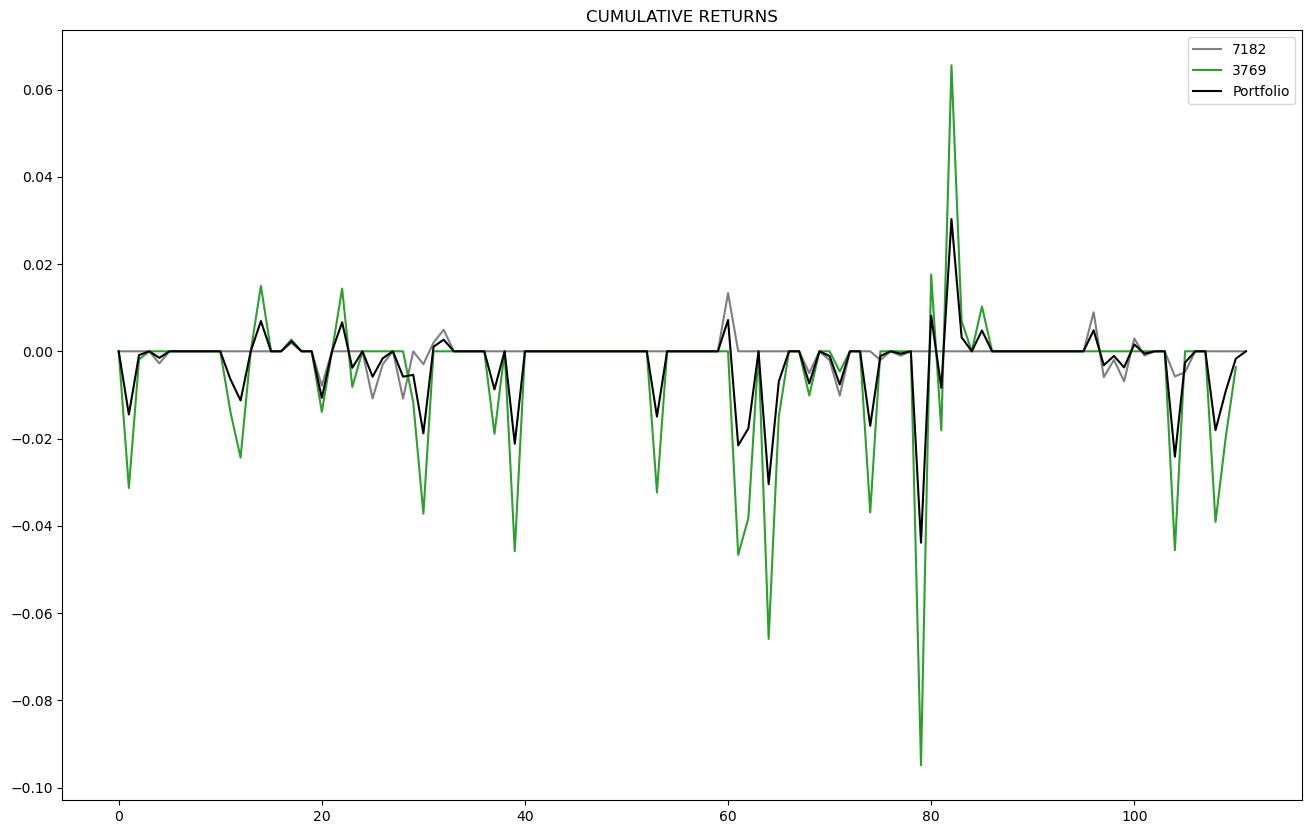

In [696]:
df_returns['Portfolio'] = portfolio_returns
colors = ['tab:gray','tab:green',"k"]
df_returns.plot(figsize=(16,10), title="CUMULATIVE RETURNS", color=colors)

The optimized portfolio allocation shows a diversified mix of assets, with varying weights assigned to each. The portfolio has generated positive returns on most transaction days, resulting in a cumulative return of 8.41% over the 110-day period. The portfolio exhibits relatively low volatility and variance, indicating a stable investment. However, the calculated VaR suggests a potential small loss at a 95% confidence level. Overall, the results indicate a reasonably balanced and performing portfolio, but further analysis and risk assessment may be necessary.